In [296]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.neighbors import KNeighborsRegressor,NearestNeighbors,KNeighborsClassifier
from sklearn.metrics import mean_absolute_error,accuracy_score,r2_score,mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,precision_score,recall_score,f1_score,classification_report
from imblearn.over_sampling import RandomOverSampler

In [334]:
df=pd.read_csv("C:/Users/james/Documents/project 4th/stocks.csv")
df.drop(columns=["labels","diff"],axis=1,inplace=True)

In [335]:
df.set_index("Date",inplace=True) #setting date column to index
df.index=pd.to_datetime(df.index) #converting to datetime

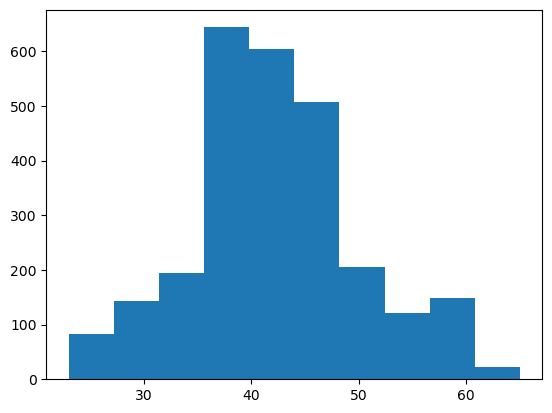

In [176]:

plt.hist(df["Close"]);

In [336]:
#introducing new variables
df["range"]=df["High"]-df["Low"]
#df['7days'] = df['Close'].rolling(window=7).mean()
df['10days'] = df['Close'].rolling(window=10).mean()#to capture trend
df['20days'] = df['Close'].rolling(window=20).mean()
df['50days'] = df['Close'].rolling(window=50).mean()
#df['14days'] = df['Close'].rolling(window=14).mean()
#df['21days'] = df['Close'].rolling(window=21).mean()
df['10days std'] = df['Close'].rolling(window=10).std()#to capture voltility
df["range1"]=df["Open"]-df["Close"]

In [337]:
df.describe()

,Open,High,Low,Close,Volume,range,10days,20days,50days,10days std,range1
count,2674.000000,2674.000000,2674.000000,2674.000000,2.674000e+03,2674.000000,2665.000000,2655.000000,2625.000000,2665.000000,2674.000000
mean,42.181339,42.762206,41.727450,42.131881,1.829527e+06,1.034757,42.153625,42.179162,42.246134,0.757203,0.049458
std,7.792890,7.926528,7.771044,7.831790,2.740638e+06,0.714514,7.752491,7.673389,7.477926,0.547770,0.341911
min,23.000000,23.400000,22.500000,23.000000,2.500000e+03,0.000000,23.420000,24.625000,25.940000,0.025820,-1.950000
25%,37.800000,38.000000,37.450000,37.750000,3.756750e+05,0.500000,37.730000,37.836250,37.909000,0.359938,0.000000
50%,41.500000,42.000000,41.000000,41.500000,1.053400e+06,0.900000,41.435000,41.350000,41.215000,0.628601,0.000000
75%,46.250000,46.800000,46.000000,46.250000,2.296775e+06,1.400000,46.300000,46.270000,46.286000,1.012423,0.000000
max,65.000000,65.500000,64.500000,65.000000,6.549700e+07,7.450000,64.250000,63.200000,61.150000,4.062091,4.100000


In [301]:
df.dropna(inplace=True)

In [302]:
df.head()

,Open,High,Low,Close,Volume,range,10days,20days,50days,7days std,range1
Date,,,,,,,,,,,
2014-03-12,46.25,46.5,46.00,46.25,1287300,0.50,44.750,44.5750,45.295,0.841625,0.0
2014-03-13,46.00,46.5,46.00,46.00,2893300,0.50,44.875,44.5875,45.260,0.783004,0.0
2014-03-14,46.00,46.5,46.00,46.00,7568300,0.50,45.100,44.6000,45.220,0.572172,0.0
2014-03-17,46.00,46.5,46.00,46.00,1806900,0.50,45.300,44.6875,45.170,0.456435,0.0
2014-03-18,46.50,47.0,46.25,46.50,1846700,0.75,45.550,44.8000,45.130,0.393398,0.0


Text(0.5, 1.0, 'volume traded')

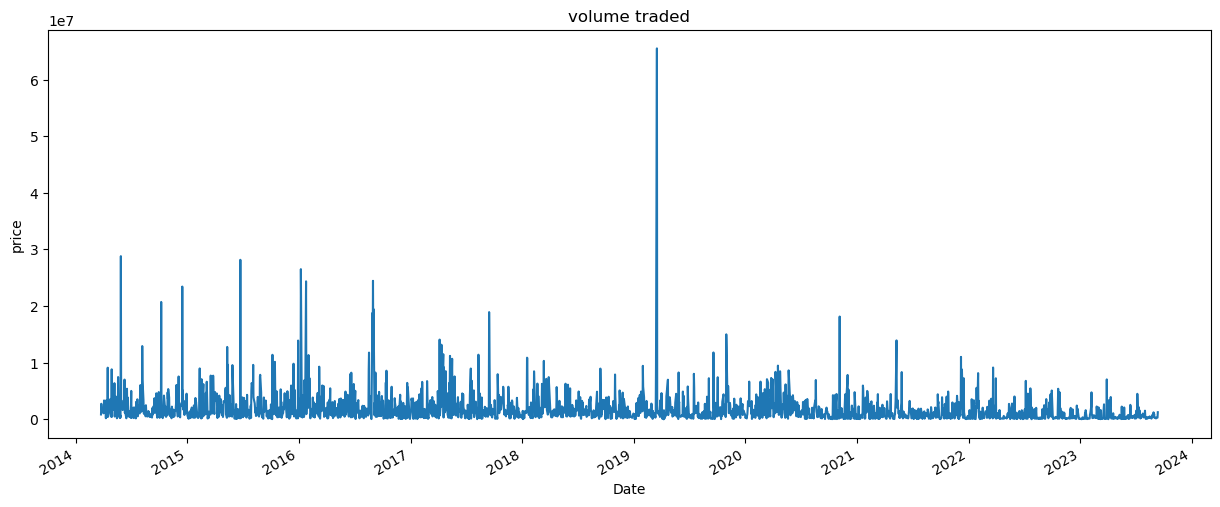

In [193]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Volume"].plot(ax=ax,label="close")
plt.xlabel("Date")
plt.ylabel("price")
plt.title("volume traded")

Text(0.5, 1.0, 'closing prices')

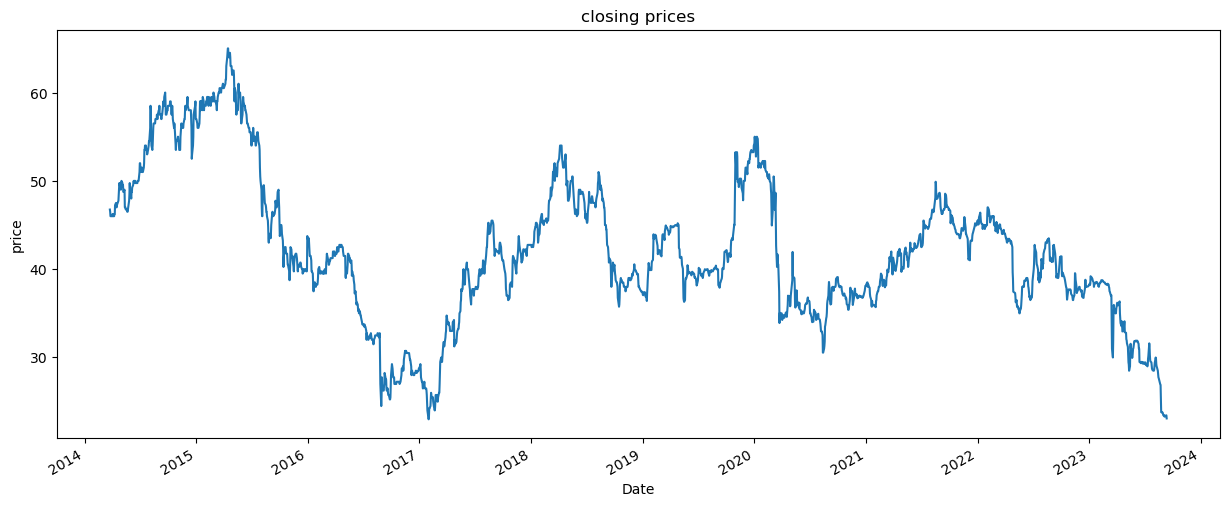

In [194]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Close"].plot(ax=ax,label="close")
plt.xlabel("Date")
plt.ylabel("price")
plt.title("closing prices")

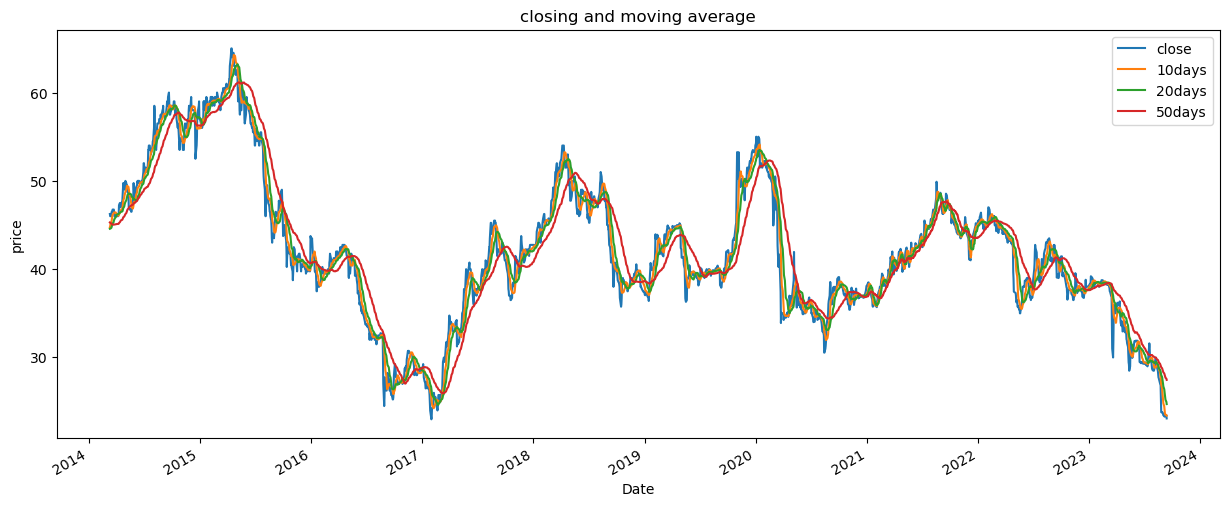

In [348]:
fig, ax = plt.subplots(figsize=(15, 6))
df["Close"].plot(ax=ax,label="close")
df["10days"].plot(ax=ax,label="10days",color="C1")
df["20days"].plot(ax=ax,label="20days",color="C2")
df["50days"].plot(ax=ax,label="50days",color="C3")
plt.xlabel("Date")
plt.ylabel("price")
plt.title("closing and moving average")
plt.legend()

In [330]:
df["range"].corr(df["Close"])

0.21428622654047216

<Axes: >

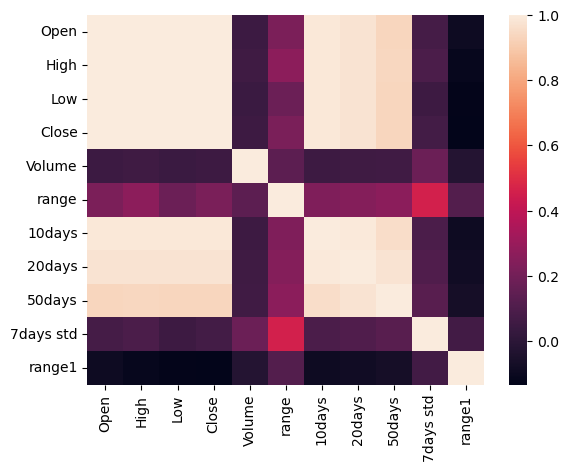

In [198]:
#to check for multicollinearity
corr=df.select_dtypes("number").corr()
sns.heatmap(corr)

In [303]:
df.dropna(inplace=True)

In [304]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2625 entries, 2014-03-12 to 2023-09-12
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2625 non-null   float64
 1   High       2625 non-null   float64
 2   Low        2625 non-null   float64
 3   Close      2625 non-null   float64
 4   Volume     2625 non-null   int64  
 5   range      2625 non-null   float64
 6   10days     2625 non-null   float64
 7   20days     2625 non-null   float64
 8   50days     2625 non-null   float64
 9   7days std  2625 non-null   float64
 10  range1     2625 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 246.1 KB


In [8]:
##train test split data into 80,20%

In [305]:
y=df["Close"]
x=df[["10days","20days","50days","10days std","range"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [338]:
#preprocessing
#scaler=MinMaxScaler()
#scaler.fit(x_train)
#rescaledXk=scaler.transform(x_train)
#rescaledXk

In [306]:
y_mean=y_train.mean()
y_train_baseline=[y_mean]*(len(y_train))
len(y_train_baseline)

2100

In [307]:
#mean absolute error compared to our mean we fit a model to get a lower mae
mae_baseline=mean_absolute_error(y_train,y_train_baseline)
mae_baseline

6.403962925170068

In [308]:
mse_baseline=mean_squared_error(y_train,y_train_baseline)
mse_baseline

66.1413859472789

In [309]:
krmodel=KNeighborsRegressor()



In [310]:
paramskr={
    "n_neighbors":range(80,100,5)
       
}

In [311]:
modelkr=GridSearchCV(krmodel,param_grid=paramskr,cv=2,n_jobs=1,verbose=1)
modelkr.fit(x_train,y_train)

Fitting 2 folds for each of 4 candidates, totalling 8 fits


GridSearchCV(cv=2, estimator=KNeighborsRegressor(), n_jobs=1,
             param_grid={'n_neighbors': range(80, 100, 5)}, verbose=1)

In [31]:
cv_resultskr=pd.DataFrame(modelkr.cv_results_)


In [312]:
Kr1=modelkr.best_estimator_
Kr1

KNeighborsRegressor(n_neighbors=80)

In [223]:
modelkr.best_params_

{'n_neighbors': 80}

In [313]:
y_pred_trainingk=Kr1.predict(x_train)
mae_training=mean_absolute_error(y_train,y_pred_trainingk)
mae_training

0.9856065476190475

In [314]:
r2=r2_score(y_train,y_pred_trainingk)
r2

0.9707975448430664

In [315]:
mean_squared_error(y_train,y_pred_trainingk)

1.931490857142857

In [316]:
pd.to_numeric(y_train)
y=y_train.to_frame("Close")
y.head()
y["predictionKN"]=y_pred_trainingk.tolist()

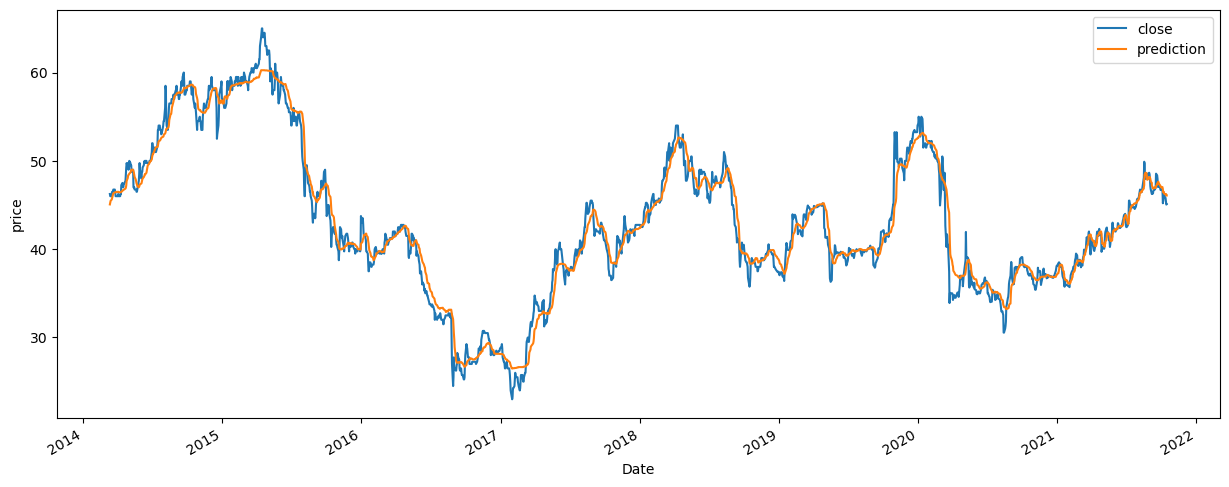

In [317]:
fig, ax = plt.subplots(figsize=(15, 6))
y["Close"].plot(ax=ax,label="close")
y["predictionKN"].plot(ax=ax,label="prediction",color="C1")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend()

In [62]:
##  random forest regression

In [143]:
#scaler=StandardScaler()
#scaler.fit(x_train)
#rescaledXr=scaler.transform(x_train)
#rescaledXr

In [318]:
Rr=RandomForestRegressor()

In [319]:
paramsr={"n_estimators":range(20,50,5),
       "max_depth":range(50,100,5)
       
}

In [320]:
modelRr=GridSearchCV(Rr,param_grid=paramsr,cv=2,n_jobs=1,verbose=1)
modelRr.fit(x_train,y_train)

Fitting 2 folds for each of 60 candidates, totalling 120 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(), n_jobs=1,
             param_grid={'max_depth': range(50, 100, 5),
                         'n_estimators': range(20, 50, 5)},
             verbose=1)

In [43]:
cv_resultsRr=pd.DataFrame(modelRr.cv_results_)


In [321]:
Rr1=modelRr.best_estimator_
Rr1

RandomForestRegressor(max_depth=60, n_estimators=35)

In [322]:
y_pred_trainingR=Rr1.predict(x_train)
mae_training=mean_absolute_error(y_train,y_pred_trainingR)
mae_training

0.20510952380952405

In [323]:
mean_squared_error(y_train,y_pred_trainingR)

0.11430745286686125

In [324]:
r2_score(y_train,y_pred_trainingR)

0.9982717711274152

In [325]:
y["predictionRF"]=y_pred_trainingR.tolist()

In [326]:
y.head()

,Close,predictionKN,predictionRF
Date,,,
2014-03-12,46.25,45.066875,46.061429
2014-03-13,46.00,45.294375,46.005714
2014-03-14,46.00,45.477500,46.000000
2014-03-17,46.00,45.626875,46.091429
2014-03-18,46.50,45.799375,46.282857


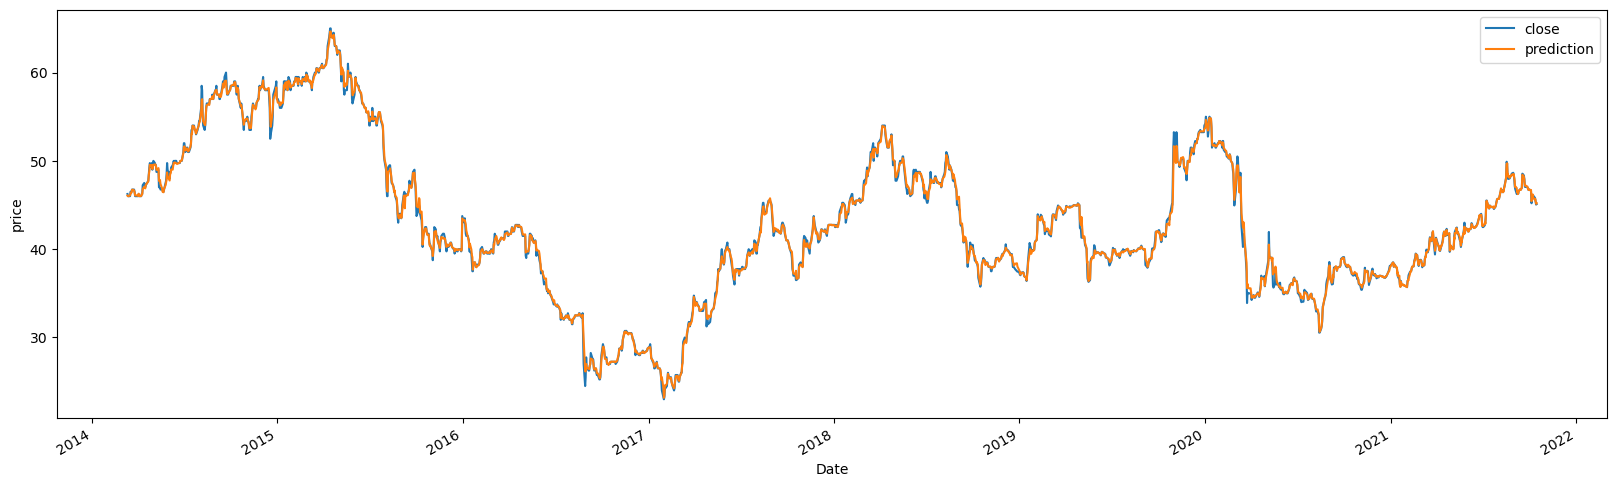

In [327]:
fig, ax = plt.subplots(figsize=(20, 6))
y["Close"].plot(ax=ax,label="close")
y["predictionRF"].plot(ax=ax,label="prediction",color="C1")
plt.xlabel("Date")
plt.ylabel("price")
plt.legend()

# EVALUATION REGRESSION

# classification

In [339]:
df=pd.read_csv("C:/Users/james/Documents/project 4th/stocks.csv")


In [340]:
df.set_index("Date",inplace=True) #setting date column to index
df.index=pd.to_datetime(df.index) #converting to datetime

In [341]:
#introducing new variables
#df["range"]=df["High"]-df["Low"]
#df['7days'] = df['Close'].rolling(window=7).mean()
df['10days'] = df['Close'].rolling(window=10).mean()
df['20days'] = df['Close'].rolling(window=20).mean()
df['50days'] = df['Close'].rolling(window=50).mean()
#df['14days'] = df['Close'].rolling(window=14).mean()
#df['21days'] = df['Close'].rolling(window=21).mean()
df['10days std'] = df['Close'].rolling(window=10).std()
#df["range1"]=df["Open"]-df["Close"]

In [342]:
df.dropna(inplace=True)

In [343]:
df["labels"]=df["labels"].astype(int)

In [344]:
df.head()

,Open,High,Low,Close,Volume,diff,labels,10days,20days,50days,10days std
Date,,,,,,,,,,,
2014-03-12,46.25,46.5,46.00,46.25,1287300,0.50,1,44.750,44.5750,45.295,0.833333
2014-03-13,46.00,46.5,46.00,46.00,2893300,-0.25,1,44.875,44.5875,45.260,0.922331
2014-03-14,46.00,46.5,46.00,46.00,7568300,0.00,0,45.100,44.6000,45.220,0.891316
2014-03-17,46.00,46.5,46.00,46.00,1806900,0.00,0,45.300,44.6875,45.170,0.839974
2014-03-18,46.50,47.0,46.25,46.50,1846700,0.50,0,45.550,44.8000,45.130,0.779957


In [345]:
#fig, ax = plt.subplots(figsize=(15, 6))
#df["labels"].plot(ax=ax,label="labels")
#plt.xlabel("Date")
#plt.ylabel("label")

In [346]:
y=df["labels"]
x=df[["10days","20days","50days","10days std"]]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,shuffle=False)

In [347]:
baseline=y_train.value_counts(normalize=True).max()
baseline

0.6438095238095238

### knn classifier

In [266]:
scaler=MinMaxScaler()
scaler.fit(x_train)
rescaledXkc=scaler.transform(x_train)
rescaledXkc


array([[0.5125    , 0.51717434, 0.54970179, 0.21890926],
       [0.515625  , 0.51749838, 0.54870775, 0.20366165],
       [0.52125   , 0.51782242, 0.54757171, 0.14882367],
       ...,
       [0.535     , 0.55165262, 0.58801477, 0.10423453],
       [0.533     , 0.54951393, 0.58733314, 0.08556331],
       [0.531     , 0.54737524, 0.58665152, 0.07274252]])

In [257]:
kcmodel=KNeighborsClassifier()


In [258]:
paramsk={"n_neighbors":range(5,50,5)
       
}

In [275]:
modelk=GridSearchCV(kcmodel,param_grid=paramsk,cv=2,n_jobs=1,verbose=1)
modelk.fit(x_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2, estimator=KNeighborsClassifier(), n_jobs=1,
             param_grid={'n_neighbors': range(5, 50, 5)}, verbose=1)

In [276]:
cv_resultsk=pd.DataFrame(modelk.cv_results_)


In [277]:
modelk.best_params_

{'n_neighbors': 40}

In [278]:
modelk.best_score_

0.6057142857142856

In [279]:
Kc=modelk.best_estimator_
Kc

KNeighborsClassifier(n_neighbors=40)

In [280]:
Kacs=accuracy_score(y_train,Kc.predict(x_train))
Kacs


0.6519047619047619

In [281]:
cmk=confusion_matrix(y_train,Kc.predict(x_train))
cmk

array([[1321,   31],
       [ 700,   48]], dtype=int64)

In [282]:
#cm=ConfusionMatrixDisplay(cmk,display_labels=True)
#cm.plot()
#cm.show()

In [283]:
precision_score(y_train,Kc.predict(x_train))

0.6075949367088608

In [284]:
recall_score(y_train,Kc.predict(x_train))

0.06417112299465241

In [285]:
f1_score(y_train,Kc.predict(x_train))

0.11608222490931076

In [165]:
#pd.to_numeric(y_train)
#yc=y_train.to_frame("labels")
#yc.head()
#yc["predictionKN"]=Kc.predict(x_train).tolist()

In [166]:
#yc.head()

In [167]:
#fig, ax = plt.subplots(figsize=(15, 6))
#yc["labels"].plot(ax=ax,label="labels")
#yc["predictionKN"].plot(ax=ax,label="prediction",color="C1")
#plt.xlabel("Date")
#plt.ylabel("labels")
#plt.legend()

### randomforest classification

In [168]:
#scaler=StandardScaler()
#scaler.fit(x_train)
#rescaledXrc=scaler.transform(x_train)
#rescaledXrc

In [286]:
Rcmodel=RandomForestClassifier()

In [287]:
params={"n_estimators":range(10,50,5),
       "max_depth":range(25,100,25)
       
}

In [288]:
model1=GridSearchCV(Rcmodel,param_grid=params,cv=5,n_jobs=1,verbose=1)
model1.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=1,
             param_grid={'max_depth': range(25, 100, 25),
                         'n_estimators': range(10, 50, 5)},
             verbose=1)

In [179]:
cv_results=pd.DataFrame(model1.cv_results_)

In [92]:
model1.best_params_

{'max_depth': 75, 'n_estimators': 20}

In [196]:
model1.best_score_

0.6052266409857954

In [289]:
Rc=model1.best_estimator_
Rc

RandomForestClassifier(max_depth=75, n_estimators=10)

In [290]:
Racs=accuracy_score(y_train,Rc.predict(x_train))
Racs

0.969047619047619

In [291]:
cmr=confusion_matrix(y_train,Rc.predict(x_train))
cmr

array([[1345,    7],
       [  58,  690]], dtype=int64)

In [292]:
#c=ConfusionMatrixDisplay(cmr,display_labels=True)
#c.plot()
#c.show()

In [293]:
precision_score(y_train,Rc.predict(x_train))

0.9899569583931134

In [294]:
recall_score(y_train,Rc.predict(x_train))

0.9224598930481284

In [295]:
f1_score(y_train,Rc.predict(x_train))

0.9550173010380623

# EVALUATION